# Individual Conditional Expectation and Partial Dependence Plot

## ICE

In [128]:
from helpers.GetDatasets import classification_split
X_train, X_test, y_train, y_test = classification_split(n_features=8)

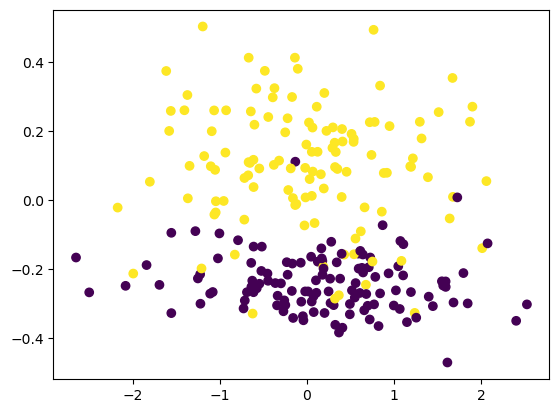

In [129]:
import matplotlib.pyplot as plt
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)

In [130]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
preds = model.predict_proba(X_test)[:,-1]

In [131]:
idx = 0
instance = X_test[idx]
probability_prediction = preds[idx]
print(f"Why did we predict probability={probability_prediction:.4f} for instance={instance}?")

Why did we predict probability=0.4762 for instance=[ 0.11422765 -0.13501379 -0.36361221  1.26280753  1.37062313  0.15030176
 -0.05694562 -0.18504421]?


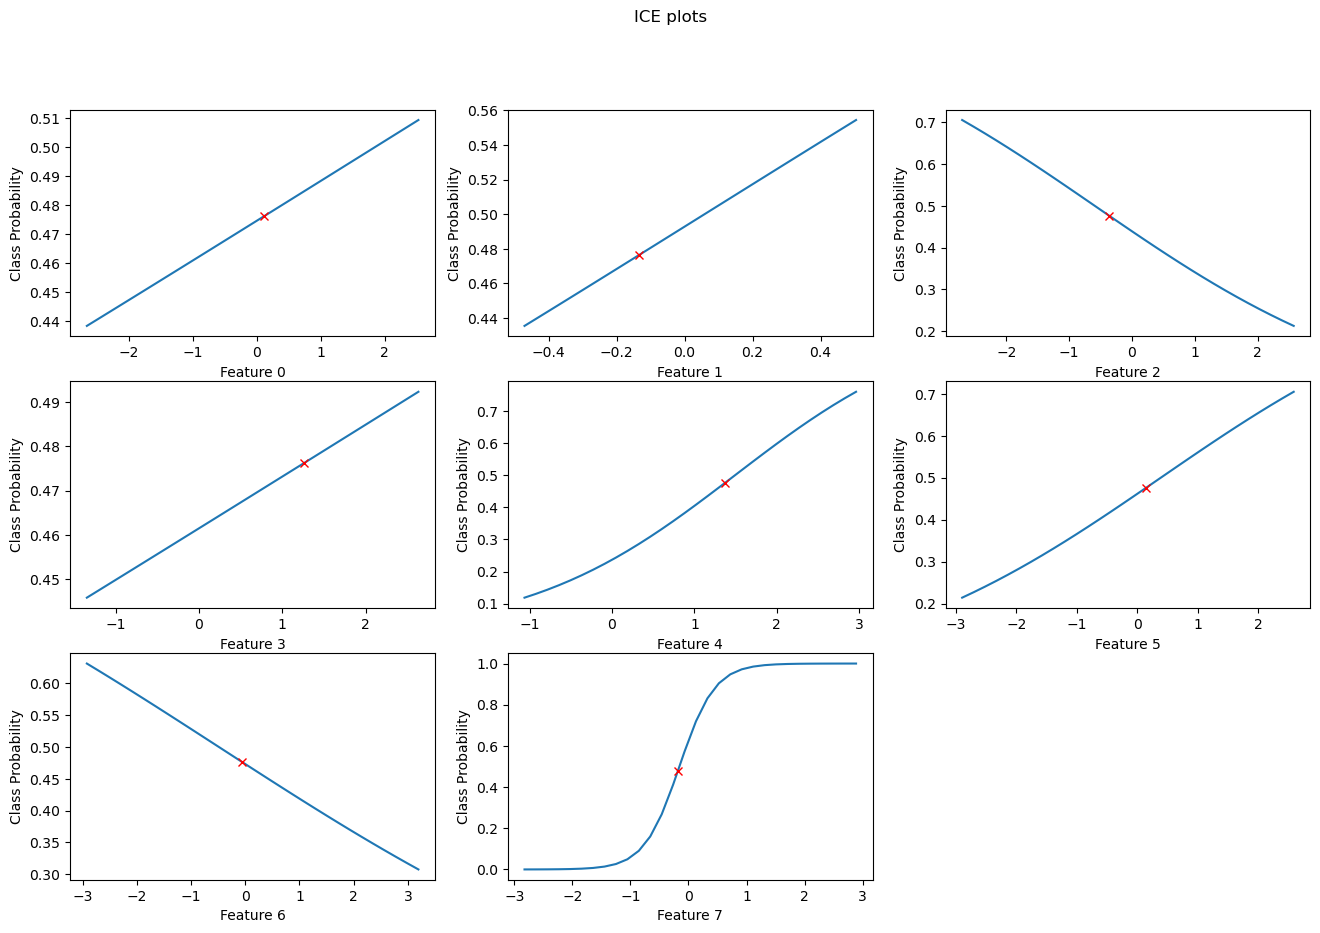

In [132]:
# ICE
import numpy as np
POINTS_PER_FEATURE = 30

n, m = X_test.shape
mins = X_train.min(axis=0)
maxs = X_train.max(axis=0)

# (2) Get POINTS PER FEATURE points spaced out evenly between min and max
grid = np.linspace(mins, maxs, num=POINTS_PER_FEATURE)

ncols = int(np.ceil(np.sqrt(m)))
nrows = int(np.ceil(m / ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(16, 10))

for feature_idx in range(m):
    # (1) Copy instance POINTS PER FEATURE times
    feature_varied_matrix = np.tile(instance, (POINTS_PER_FEATURE, 1))

    # For each feature in (1) copied, replace the feature column with (2)
    feature_varied_matrix[:, feature_idx] = grid[:, feature_idx]
    
    # Predict on new matrix
    preds = model.predict_proba(feature_varied_matrix)[:,-1]

    # Plot feature vs prediction trend
    row, col = divmod(feature_idx, ncols)
    axes[row, col].plot(grid[:, feature_idx], preds)
    axes[row, col].plot(instance[feature_idx], probability_prediction, marker="x", c="r")
    axes[row, col].set_xlabel(f"Feature {feature_idx}")
    axes[row, col].set_ylabel("Class Probability")


for i in range(m, nrows * ncols):
    r, c = divmod(i, ncols)
    axes[r, c].axis("off")

fig.suptitle("ICE plots")
plt.show()

## PDP

In [135]:
print(f"How do each of the features effect the class probability on average?")

How do each of the features effect the class probability on average?


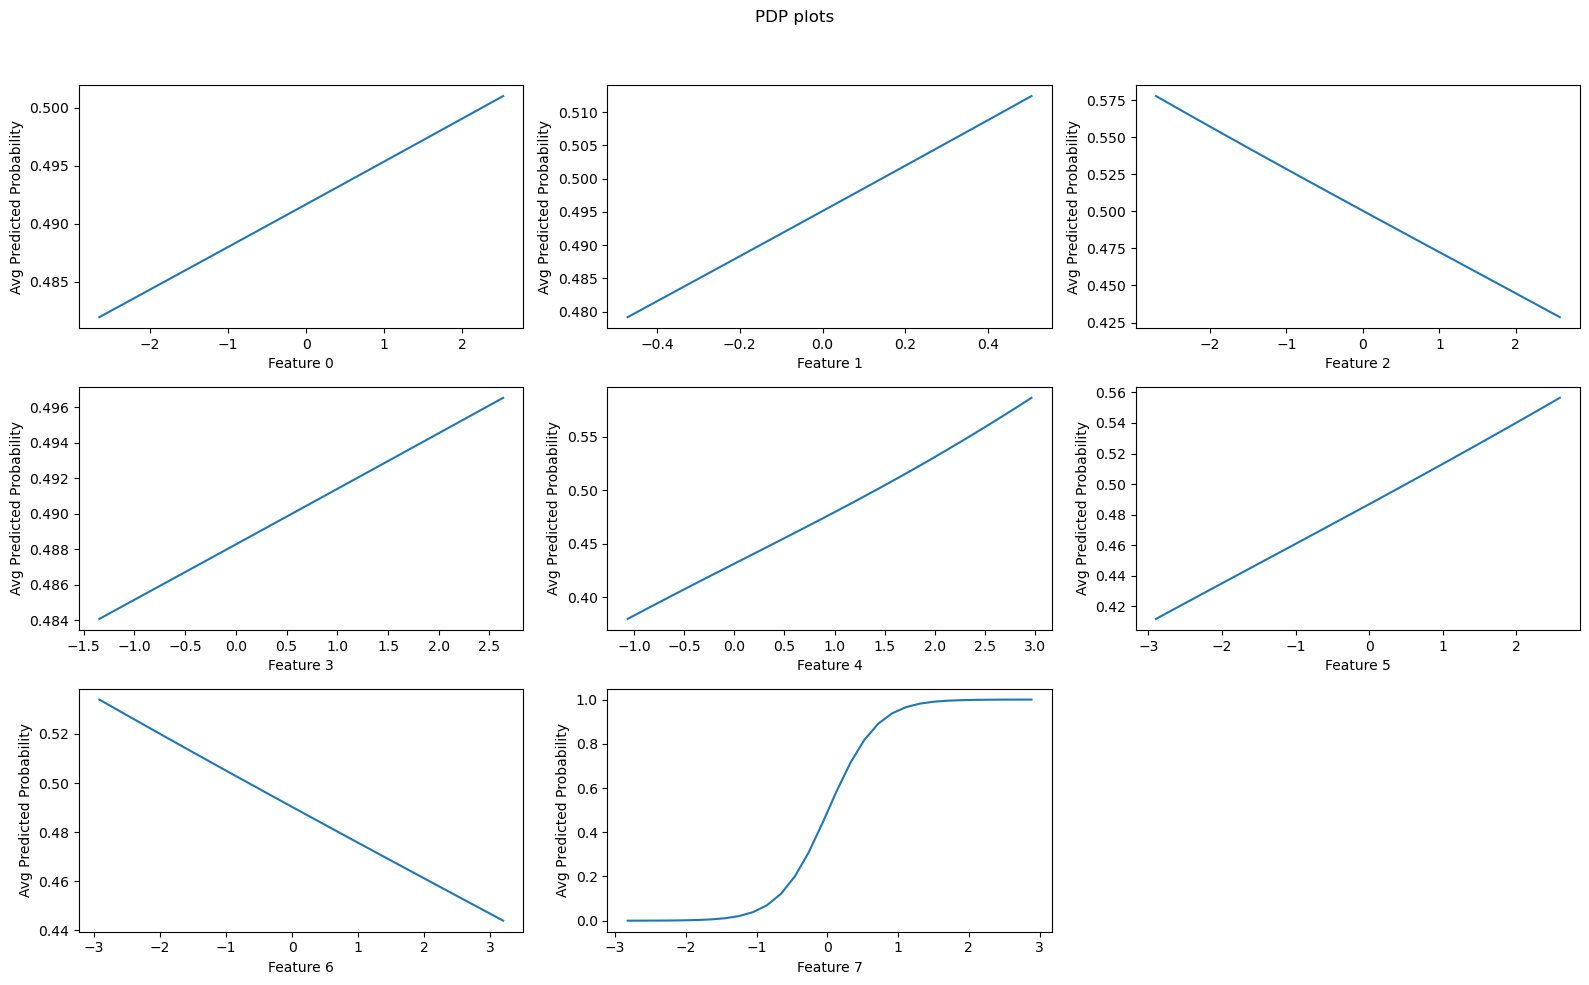

In [133]:
POINTS_PER_FEATURE = 30

n, m = X_train.shape
mins = X_train.min(axis=0)
maxs = X_train.max(axis=0)

grid = np.linspace(mins, maxs, num=POINTS_PER_FEATURE)

ncols = int(np.ceil(np.sqrt(m)))
nrows = int(np.ceil(m / ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(16, 10))

for feature_idx in range(m):
    pdp_preds = np.zeros(POINTS_PER_FEATURE)

    for i in range(POINTS_PER_FEATURE):
        X_pdp = X_train.copy()
        X_pdp[:, feature_idx] = grid[i, feature_idx]

        preds = model.predict_proba(X_pdp)[:, -1]
        pdp_preds[i] = preds.mean()

    r, c = divmod(feature_idx, ncols)
    axes[r, c].plot(grid[:, feature_idx], pdp_preds)
    axes[r, c].set_xlabel(f"Feature {feature_idx}")
    axes[r, c].set_ylabel("Avg Predicted Probability")

for i in range(m, nrows * ncols):
    r, c = divmod(i, ncols)
    axes[r, c].axis("off")

fig.suptitle("PDP plots")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()